In [31]:
import pandas as pd
import numpy as np

In [32]:
# 1. wstępna analiza danych i czyszczenie:
pd.set_option('display.max_columns', None)
df = pd.read_csv("messy_data.csv")
df.head()

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.5,IF,D,Ideal,5.1,5.15,3.2,61.5,,3000
1,0.7,vvs2,E,premium,5.7,,3.52,62,59,4500
2,NaN,Si2,h,Good,4.3,4.31,,62.3,56,700
3,1.2,if,d,ideal,,6.82,4.2,61.7,58,10000
4,0.9,I1,J,Fair,6,,3.7,61.7,,2400


In [33]:
df

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,IF,D,Ideal,5.1,5.15,3.2,61.5,,3000
1,0.70,vvs2,E,premium,5.7,,3.52,62,59,4500
2,NaN,Si2,h,Good,4.3,4.31,,62.3,56,700
3,1.20,if,d,ideal,,6.82,4.2,61.7,58,10000
4,0.90,I1,J,Fair,6,,3.7,61.7,,2400
...,...,...,...,...,...,...,...,...,...,...
195,0.45,si1,F,very good,4.9,4.89,,62.4,59,2300
196,1.25,VVS2,H,Good,6.9,,4.27,,55,10400
197,0.55,i1,I,Premium,5.3,,3.28,62.3,57,150000
198,0.85,Si2,E,fair,6.1,6.13,3.78,,58,6300


In [34]:
df.dtypes

carat           float64
 clarity         object
 color           object
 cut             object
 x dimension     object
 y dimension     object
 z dimension     object
 depth           object
 table           object
 price           object
dtype: object

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         150 non-null    float64
 1    clarity      200 non-null    object 
 2    color        200 non-null    object 
 3    cut          200 non-null    object 
 4    x dimension  200 non-null    object 
 5    y dimension  200 non-null    object 
 6    z dimension  200 non-null    object 
 7    depth        200 non-null    object 
 8    table        200 non-null    object 
 9    price        200 non-null    object 
dtypes: float64(1), object(9)
memory usage: 15.8+ KB


In [36]:
# Pozbycie się spacji z początku nazw kolumn
df.columns = df.columns.str.lstrip()

# Zamiana pozostałych spacji nazw na _
df.columns = df.columns.str.replace(' ', '_')
df

,carat,clarity,color,cut,x_dimension,y_dimension,z_dimension,depth,table,price
0,0.50,IF,D,Ideal,5.1,5.15,3.2,61.5,,3000
1,0.70,vvs2,E,premium,5.7,,3.52,62,59,4500
2,NaN,Si2,h,Good,4.3,4.31,,62.3,56,700
3,1.20,if,d,ideal,,6.82,4.2,61.7,58,10000
4,0.90,I1,J,Fair,6,,3.7,61.7,,2400
...,...,...,...,...,...,...,...,...,...,...
195,0.45,si1,F,very good,4.9,4.89,,62.4,59,2300
196,1.25,VVS2,H,Good,6.9,,4.27,,55,10400
197,0.55,i1,I,Premium,5.3,,3.28,62.3,57,150000
198,0.85,Si2,E,fair,6.1,6.13,3.78,,58,6300


In [37]:
# df = df.replace('\n',np.NaN, regex=True)
df = df.replace(r'^\s*$', np.NaN, regex=True)
df

,carat,clarity,color,cut,x_dimension,y_dimension,z_dimension,depth,table,price
0,0.50,IF,D,Ideal,5.1,5.15,3.2,61.5,NaN,3000
1,0.70,vvs2,E,premium,5.7,NaN,3.52,62,59,4500
2,NaN,Si2,h,Good,4.3,4.31,NaN,62.3,56,700
3,1.20,if,d,ideal,NaN,6.82,4.2,61.7,58,10000
4,0.90,I1,J,Fair,6,NaN,3.7,61.7,NaN,2400
...,...,...,...,...,...,...,...,...,...,...
195,0.45,si1,F,very good,4.9,4.89,NaN,62.4,59,2300
196,1.25,VVS2,H,Good,6.9,NaN,4.27,NaN,55,10400
197,0.55,i1,I,Premium,5.3,NaN,3.28,62.3,57,150000
198,0.85,Si2,E,fair,6.1,6.13,3.78,NaN,58,6300


In [38]:
df['x_dimension'].isna().sum()

3

In [39]:
df['y_dimension'].isna().sum()

64

In [40]:
df['z_dimension'].isna().sum()

48

In [41]:
df['depth'].isna().sum()

67

In [42]:
df['price'].isna().sum()

4

In [43]:
df['table'].isna().sum()

33

In [44]:
# Zmiana typu object na float64
df['x_dimension'] = df['x_dimension'].astype("float")
df['y_dimension'] = df['y_dimension'].astype("float64")
df['z_dimension'] = df['z_dimension'].astype("float64")
df['depth'] = df['depth'].astype("float64")

# Zmiana typu object na float64 (ale później będzie na int64)
df['table'] = df['table'].astype("float64")
df['price'] = df['price'].astype("float64")

#Sprawdzenie poprawności zmiany
df.dtypes

carat          float64
clarity         object
color           object
cut             object
x_dimension    float64
y_dimension    float64
z_dimension    float64
depth          float64
table          float64
price          float64
dtype: object

In [45]:
# Zastąpienie wartości NaN na średnią
df['x_dimension'] = df['x_dimension'].fillna(df['x_dimension'].mean())
df['y_dimension'] = df['y_dimension'].fillna(df['y_dimension'].mean())
df['z_dimension'] = df['z_dimension'].fillna(df['z_dimension'].mean())
df['depth'] = df['depth'].fillna(df['depth'].mean())
df['price'] = df['price'].fillna(df['price'].mean())
df['table'] = df['table'].fillna(df['table'].mean())
df['carat'] = df['carat'].fillna(df['carat'].mean())
df

,carat,clarity,color,cut,x_dimension,y_dimension,z_dimension,depth,table,price
0,0.500,IF,D,Ideal,5.100000,5.150000,3.200000,61.500000,56.91018,3000.0
1,0.700,vvs2,E,premium,5.700000,5.829706,3.520000,62.000000,59.00000,4500.0
2,0.799,Si2,h,Good,4.300000,4.310000,3.694671,62.300000,56.00000,700.0
3,1.200,if,d,ideal,5.885787,6.820000,4.200000,61.700000,58.00000,10000.0
4,0.900,I1,J,Fair,6.000000,5.829706,3.700000,61.700000,56.91018,2400.0
...,...,...,...,...,...,...,...,...,...,...
195,0.450,si1,F,very good,4.900000,4.890000,3.694671,62.400000,59.00000,2300.0
196,1.250,VVS2,H,Good,6.900000,5.829706,4.270000,62.316541,55.00000,10400.0
197,0.550,i1,I,Premium,5.300000,5.829706,3.280000,62.300000,57.00000,150000.0
198,0.850,Si2,E,fair,6.100000,6.130000,3.780000,62.316541,58.00000,6300.0


In [46]:
print(f"x_dimension mean: {df['x_dimension'].mean()}")
print(f"y_dimension mean: {df['y_dimension'].mean()}")
print(f"z_dimension mean: {df['z_dimension'].mean()}")
print(f"depth mean: {df['depth'].mean()}")
print(f"price mean: {df['price'].mean()}")
print(f"table mean: {df['table'].mean()}")
print(f"carat mean: {df['carat'].mean()}")

x_dimension mean: 5.885786802030457
y_dimension mean: 5.8297058823529415
z_dimension mean: 3.6946710526315787
depth mean: 62.31654135338346
price mean: 11410.714285714286
table mean: 56.91017964071856
carat mean: 0.7989999999999999


In [47]:
# Zmiana typu object na int64

df['table'] = df['table'].astype("int64")
df['price'] = df['price'].astype("int64")
df.dtypes

carat          float64
clarity         object
color           object
cut             object
x_dimension    float64
y_dimension    float64
z_dimension    float64
depth          float64
table            int64
price            int64
dtype: object

In [48]:
# Uporządkowanie danych kategorycznych
df['clarity'].value_counts()

clarity
i1      26
si2     23
VVS1    23
IF      20
VVS2    19
vvs2    18
si1     18
Si2     16
Si1     12
vvs1    11
I1       5
SI2      5
if       3
Vvs1     1
Name: count, dtype: int64

In [49]:
df["clarity"].replace("I1", "i1", regex=True, inplace=True)
df["clarity"].replace(["Si2", "SI2"], "si2", regex=True, inplace=True)
df["clarity"].replace(["VVS1", "Vvs1"], "vvs1", regex=True, inplace=True)
df["clarity"].replace("IF", "if", regex=True, inplace=True)
df["clarity"].replace("VVS2", "vvs2", regex=True, inplace=True)
df["clarity"].replace("Si1", "si1", regex=True, inplace=True)
df['clarity'].value_counts()

/var/folders/h9/lfb00ryj53j0_n33t8ztmv_h0000gn/T/ipykernel_7852/2061611597.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["clarity"].replace("I1", "i1", regex=True, inplace=True)
/var/folders/h9/lfb00ryj53j0_n33t8ztmv_h0000gn/T/ipykernel_7852/2061611597.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

clarity
si2     44
vvs2    37
vvs1    35
i1      31
si1     30
if      23
Name: count, dtype: int64

In [50]:
df['color'].value_counts()

color
G            36
I            33
H            30
F            24
D            13
E            13
e            12
d             9
f             6
j             6
colorless     6
h             4
g             4
J             2
Colorless     2
Name: count, dtype: int64

In [51]:
df["color"].replace("g", "G", regex=True, inplace=True)
df["color"].replace("h", "H", regex=True, inplace=True)
df["color"].replace("f", "F", regex=True, inplace=True)
df["color"].replace("j", "J", regex=True, inplace=True)
df["color"].replace("e", "E", regex=True, inplace=True)
df["color"].replace("d", "D", regex=True, inplace=True)
df["color"].replace(["colorlEss", "ColorlEss"], "colorless", regex=True, inplace=True)
df['color'].value_counts()

/var/folders/h9/lfb00ryj53j0_n33t8ztmv_h0000gn/T/ipykernel_7852/3290809260.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["color"].replace("g", "G", regex=True, inplace=True)
/var/folders/h9/lfb00ryj53j0_n33t8ztmv_h0000gn/T/ipykernel_7852/3290809260.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

color
G            40
H            34
I            33
F            30
E            25
D            22
J             8
colorless     8
Name: count, dtype: int64

In [52]:
df['cut'].value_counts()

cut
Premium      34
Good         30
fair         24
Ideal        23
good         21
very good    19
Fair         12
Very good    10
ideal         9
Very Good     9
premium       7
very Good     2
Name: count, dtype: int64

In [53]:
df["cut"].replace("Premium", "premium", regex=True, inplace=True)
df["cut"].replace("Good", "good", regex=True, inplace=True)
df["cut"].replace("Fair", "fair", regex=True, inplace=True)
df["cut"].replace("Ideal", "ideal", regex=True, inplace=True)
df["cut"].replace(["Very good", "very good"], "very_good", regex=True, inplace=True)
df['cut'].value_counts()

/var/folders/h9/lfb00ryj53j0_n33t8ztmv_h0000gn/T/ipykernel_7852/1228129747.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["cut"].replace("Premium", "premium", regex=True, inplace=True)
/var/folders/h9/lfb00ryj53j0_n33t8ztmv_h0000gn/T/ipykernel_7852/1228129747.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

cut
good         51
premium      41
very_good    40
fair         36
ideal        32
Name: count, dtype: int64

In [54]:
#Zmiana typu object na category
df['clarity'] = df['clarity'].astype("category")
df['color'] = df['color'].astype("category")
df['cut'] = df['cut'].astype("category")

df.dtypes

carat           float64
clarity        category
color          category
cut            category
x_dimension     float64
y_dimension     float64
z_dimension     float64
depth           float64
table             int64
price             int64
dtype: object

In [55]:
# Pozbycie się duplikatów
duplicates = df.duplicated(subset=["carat", "table", "price"], keep=False)

# Używając df[duplikaty], zwracane są punkty danych, w których istnieją duplikaty.
## Zwróć duplikaty dla ramki danych lotów
df[duplicates]

,carat,clarity,color,cut,x_dimension,y_dimension,z_dimension,depth,table,price
6,0.500,if,D,ideal,5.1,5.829706,3.200000,61.500000,57,3100
11,0.400,vvs2,G,very_good,4.9,4.880000,3.694671,61.200000,56,1400
29,0.799,vvs1,D,ideal,6.7,6.710000,4.150000,62.316541,58,7700
40,0.450,si2,H,ideal,4.8,4.820000,3.010000,62.100000,56,1500
50,0.650,si1,colorless,very_good,5.6,5.580000,3.480000,62.600000,56,3300
54,1.300,si2,F,good,6.9,5.829706,4.260000,62.300000,57,9900
56,0.400,si1,J,very_good,4.8,4.780000,2.960000,62.200000,56,1400
63,0.750,vvs1,H,good,5.8,5.810000,3.694671,62.300000,56,4600
68,0.799,vvs1,H,ideal,6.8,6.790000,4.210000,62.200000,56,7900
75,0.550,vvs2,D,very_good,5.4,5.829706,3.340000,62.400000,56,2800


In [56]:
df[duplicates].sort_values("carat")
# Po przeanalizowaniu poniżej tabeli, można wyciągąć wnioski, że nie mamy zduplikowanych wartości, niektóre
# z nich mają bardzo podobne rekordy, ale prawdopodobne jest, że istnieje kilka kamieni o bardzo poodbnych parametrach

,carat,clarity,color,cut,x_dimension,y_dimension,z_dimension,depth,table,price
11,0.400,vvs2,G,very_good,4.9,4.880000,3.694671,61.200000,56,1400
56,0.400,si1,J,very_good,4.8,4.780000,2.960000,62.200000,56,1400
40,0.450,si2,H,ideal,4.8,4.820000,3.010000,62.100000,56,1500
99,0.450,si2,H,ideal,4.8,4.790000,2.970000,62.316541,56,1500
6,0.500,if,D,ideal,5.1,5.829706,3.200000,61.500000,57,3100
171,0.500,vvs1,H,very_good,5.2,5.829706,3.220000,62.100000,57,3100
128,0.550,si1,I,fair,5.4,5.390000,3.330000,62.600000,56,2800
75,0.550,vvs2,D,very_good,5.4,5.829706,3.340000,62.400000,56,2800
167,0.600,if,H,very_good,5.5,5.490000,3.410000,62.316541,56,3600
119,0.600,vvs1,H,good,5.5,5.490000,3.694671,62.100000,56,3600


array([[<Axes: title={'center': 'price'}>]], dtype=object)

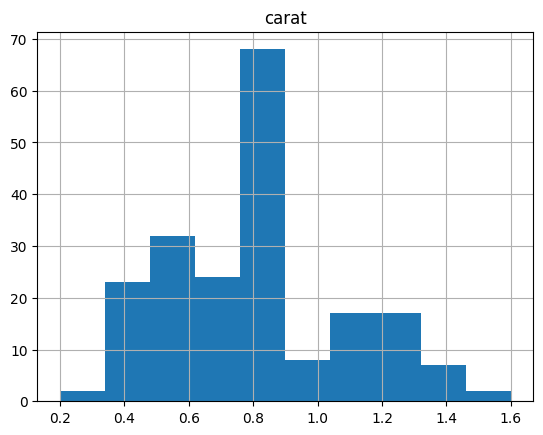

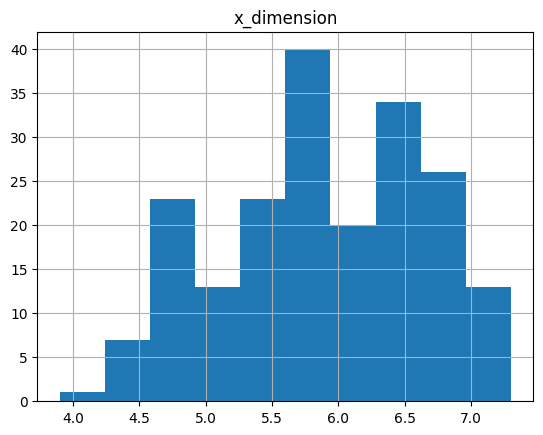

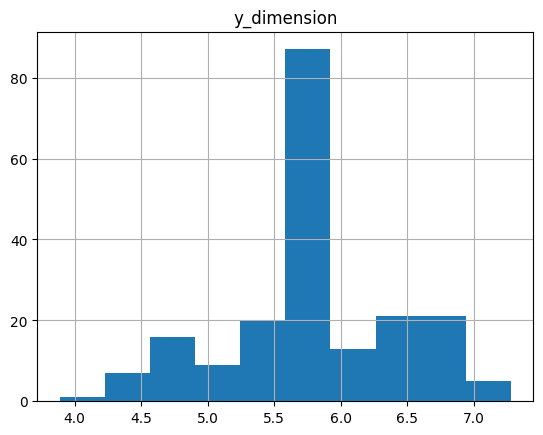

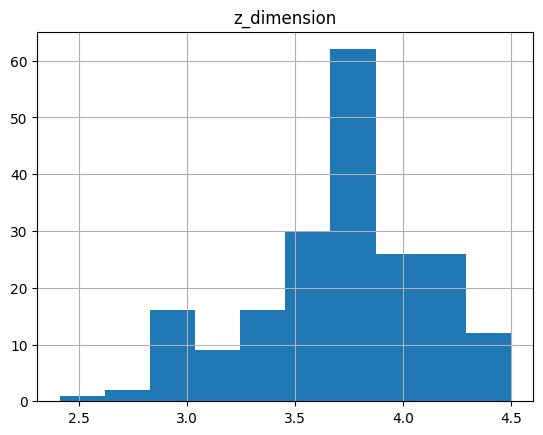

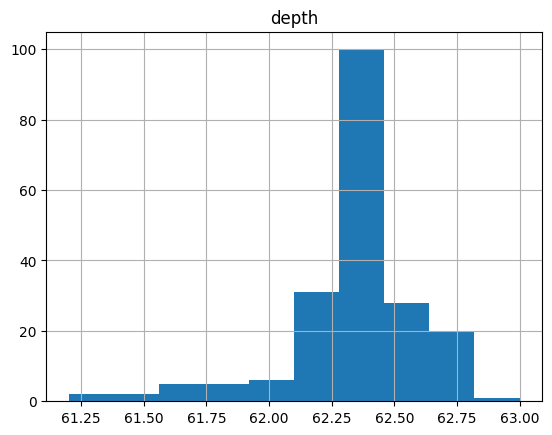

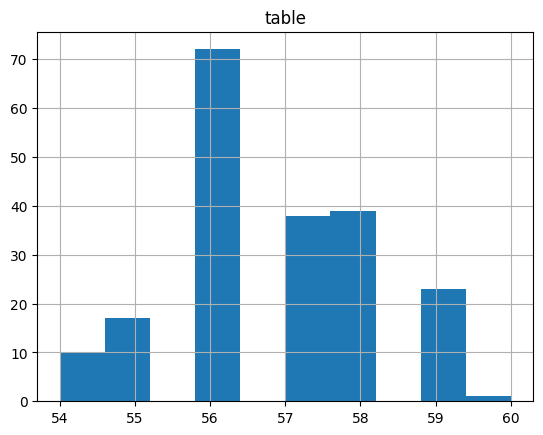

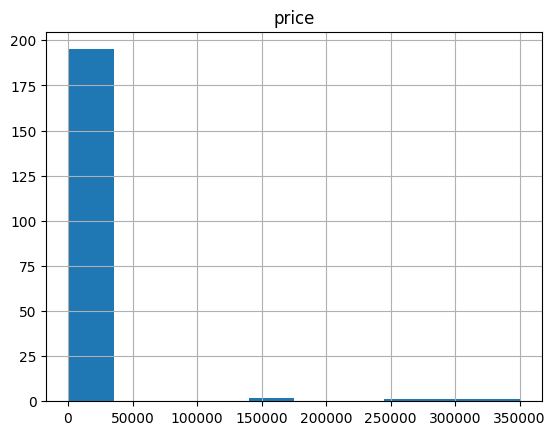

In [57]:
# Sprawdzenie wartości odstających
df.hist(column="carat")
df.hist(column="x_dimension")
df.hist(column="y_dimension")
df.hist(column="z_dimension")
df.hist(column="depth")
df.hist(column="table")
df.hist(column="price")

array([[<Axes: title={'center': 'price'}>]], dtype=object)

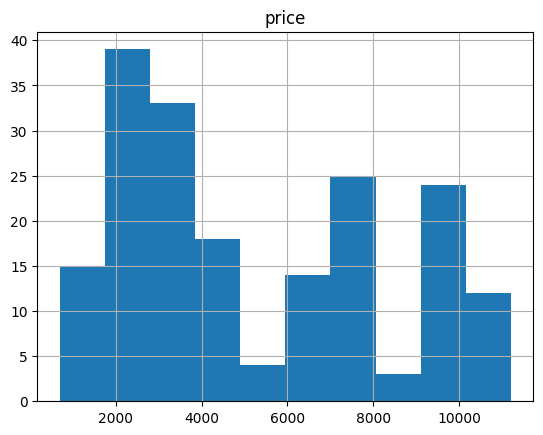

In [58]:
# Na histogramie atrybutu cena możemy zaobserwować duże wartości odstające, których należy się pozbyć
q_low = df["price"].quantile(0.01)
q_hi  = df["price"].quantile(0.96)
df_filtered = df[(df["price"] < q_hi) & (df["price"] > q_low)]
df = df_filtered
df.hist(column="price")

In [59]:
# Modelowanie
import statsmodels.formula.api as smf

In [60]:
model = smf.ols("price ~ carat + x_dimension + y_dimension + z_dimension + depth + table + C(clarity) + C(color) + C(cut)", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     70.23
Date:                Sat, 03 Feb 2024   Prob (F-statistic):           9.06e-72
Time:                        20:55:17   Log-Likelihood:                -1545.5
No. Observations:                 187   AIC:                             3137.
Df Residuals:                     164   BIC:                             3211.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5.181e+04   2.24e+04     -2.314      0.022    -9.6e+04   -7592.370
C(clarity)[T. if]       2357.9208    318.504      7.403      0.000    1729.023    2986.819
C(clarity)[T. si1]      1464.7025    289.935      5.052      0.000     892.217    2037.188
C(clarity)[T. si2]      1351.6266    263.344      5.133      0.000     831.645    1871.608
C(clarity)[T. vvs1]     2068.4395    293.332      7.052      0.000    1489.245    2647.634
C(clarity)[T. vvs2]     2070.8633    284.421      7.281      0.000    1509.264    2632.463
C(color)[T. E]          -755.7677    341.383     -2.214      0.028   -1429.839     -81.696
C(color)[T. F]          -366.0353    311.122     -1.177      0.241    -980.356     248.286
C(color)[T. G]          -283.1479    302.973     -0.935      0.351    -881.378     315.082
C(color)[T. H]          -593.6465    312.502     -1.900      0.059   -1210.693      23.400
C(color)[T. I]          -433.7162    328.822     -1.319      0.189   -1082.987     215.554
C(color)[T. J]          -702.1827    454.832     -1.544      0.125   -1600.265     195.899
C(color)[T. colorless]  -682.8539    485.905     -1.405      0.162   -1642.290     276.583
C(cut)[T. good]           47.6857    250.252      0.191      0.849    -446.446     541.818
C(cut)[T. ideal]         576.3849    275.815      2.090      0.038      31.778    1120.992
C(cut)[T. premium]       831.2679    276.419      3.007      0.003     285.469    1377.067
C(cut)[T. very_good]     262.2643    261.498      1.003      0.317    -254.073     778.602
carat                   2786.2598    652.983      4.267      0.000    1496.921    4075.598
x_dimension             2699.3996    385.110      7.009      0.000    1938.987    3459.812
y_dimension             -208.3457    235.531     -0.885      0.378    -673.409     256.718
z_dimension              199.2689    415.385      0.480      0.632    -620.923    1019.461
depth                    517.3725    352.600      1.467      0.144    -178.849    1213.594
table                    101.1228     63.824      1.584      0.115     -24.899     227.145
==============================================================================
Omnibus:                       56.785   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.916
Skew:                          -1.008   Prob(JB):                     4.54e-66
Kurtosis:                       8.878   Cond. No.                     2.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
print("Model P Values:", model.pvalues.values)
print("Model Coef:", model.params.values)
print("Model Std Errs:", model.bse.values)

Model P Values: [2.19328986e-02 6.59652828e-12 1.15629130e-06 8.00634984e-07
 4.69315338e-11 1.31096535e-11 2.82191040e-02 2.41099480e-01
 3.51385920e-01 5.92337320e-02 1.89007895e-01 1.24557481e-01
 1.61816636e-01 8.49113574e-01 3.81834786e-02 3.05143073e-03
 3.17372415e-01 3.34080660e-05 5.91756855e-11 3.77678599e-01
 6.32064910e-01 1.44208115e-01 1.15026287e-01]
Model Coef: [-5.18107947e+04  2.35792080e+03  1.46470254e+03  1.35162665e+03
  2.06843950e+03  2.07086334e+03 -7.55767679e+02 -3.66035325e+02
 -2.83147923e+02 -5.93646516e+02 -4.33716189e+02 -7.02182723e+02
 -6.82853853e+02  4.76856697e+01  5.76384939e+02  8.31267888e+02
  2.62264277e+02  2.78625975e+03  2.69939963e+03 -2.08345706e+02
  1.99268860e+02  5.17372474e+02  1.01122776e+02]
Model Std Errs: [22394.35299128   318.50441993   289.93450234   263.34375044
   293.33191717   284.42121465   341.38259891   311.12191878
   302.97257521   312.50236136   328.82201172   454.83228962
   485.90515071   250.25235009   275.81532312 

In [62]:
dummydf = pd.get_dummies(df, columns = ['clarity'])
dummydf = pd.get_dummies(dummydf, columns = ['color'])
dummydf = pd.get_dummies(dummydf, columns = ['cut'])
dummydf

,carat,x_dimension,y_dimension,z_dimension,depth,table,price,clarity_ i1,clarity_ if,clarity_ si1,clarity_ si2,clarity_ vvs1,clarity_ vvs2,color_ D,color_ E,color_ F,color_ G,color_ H,color_ I,color_ J,color_ colorless,cut_ fair,cut_ good,cut_ ideal,cut_ premium,cut_ very_good
0,0.500,5.100000,5.150000,3.200000,61.500000,56,3000,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
1,0.700,5.700000,5.829706,3.520000,62.000000,59,4500,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False
2,0.799,4.300000,4.310000,3.694671,62.300000,56,700,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
3,1.200,5.885787,6.820000,4.200000,61.700000,58,10000,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
4,0.900,6.000000,5.829706,3.700000,61.700000,56,2400,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.950,6.400000,6.420000,3.960000,62.316541,56,7100,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
195,0.450,4.900000,4.890000,3.694671,62.400000,59,2300,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
196,1.250,6.900000,5.829706,4.270000,62.316541,55,10400,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False
198,0.850,6.100000,6.130000,3.780000,62.316541,58,6300,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False


In [63]:
import plotly.express as px
px.imshow(dummydf.corr(), color_continuous_scale='Agsunset', title="Correlation heatmap for diamond",text_auto=True)

In [67]:
# Dopasowanie modelu z wykorzystaniem eliminacji wstecznej
# Pozbywany się z_dimension i cut
model = smf.ols("price ~ carat + x_dimension + y_dimension + depth + table + C(clarity) + C(color)", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     84.19
Date:                Sat, 03 Feb 2024   Prob (F-statistic):           4.05e-73
Time:                        20:56:01   Log-Likelihood:                -1554.5
No. Observations:                 187   AIC:                             3145.
Df Residuals:                     169   BIC:                             3203.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5.465e+04   2.22e+04     -2.464      0.015   -9.84e+04   -1.09e+04
C(clarity)[T. if]       2480.9579    324.232      7.652      0.000    1840.891    3121.025
C(clarity)[T. si1]      1537.3558    288.728      5.325      0.000     967.378    2107.334
C(clarity)[T. si2]      1307.2727    269.580      4.849      0.000     775.095    1839.451
C(clarity)[T. vvs1]     2108.2820    297.186      7.094      0.000    1521.607    2694.957
C(clarity)[T. vvs2]     2037.5773    291.651      6.986      0.000    1461.828    2613.326
C(color)[T. E]          -499.4540    335.873     -1.487      0.139   -1162.501     163.593
C(color)[T. F]          -293.5663    315.926     -0.929      0.354    -917.236     330.103
C(color)[T. G]          -145.7666    304.724     -0.478      0.633    -747.322     455.788
C(color)[T. H]          -596.4648    316.140     -1.887      0.061   -1220.558      27.628
C(color)[T. I]          -336.8344    327.715     -1.028      0.305    -983.776     310.108
C(color)[T. J]          -668.6790    458.300     -1.459      0.146   -1573.409     236.051
C(color)[T. colorless]  -470.3138    488.262     -0.963      0.337   -1434.191     493.564
carat                   2564.5286    657.708      3.899      0.000    1266.148    3862.910
x_dimension             2944.6902    306.181      9.617      0.000    2340.258    3549.123
y_dimension             -322.9141    226.247     -1.427      0.155    -769.549     123.721
depth                    514.2873    353.002      1.457      0.147    -182.573    1211.148
table                    160.7042     61.910      2.596      0.010      38.488     282.920
==============================================================================
Omnibus:                       46.648   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.162
Skew:                          -0.843   Prob(JB):                     2.31e-46
Kurtosis:                       7.913   Cond. No.                     2.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
print("Model P Values:", model.pvalues.values)
print("Model Coef:", model.params.values)
print("Model Std Errs:", model.bse.values)

Model P Values: [1.47570583e-02 1.44054118e-12 3.18668250e-07 2.79444644e-06
 3.41202912e-11 6.20521601e-11 1.38869664e-01 3.54097631e-01
 6.33014523e-01 6.09145628e-02 3.05499702e-01 1.46409599e-01
 3.36802607e-01 1.39007292e-04 9.75319278e-18 1.55349579e-01
 1.47000064e-01 1.02682830e-02]
Model Coef: [-54645.50633464   2480.95789458   1537.35575889   1307.27274399
   2108.28199649   2037.5772944    -499.45404998   -293.56630626
   -145.76661359   -596.4647569    -336.83435076   -668.67904983
   -470.31375836   2564.52863365   2944.69024995   -322.91412673
    514.28733092    160.70416585]
Model Std Errs: [22181.30297945   324.23223377   288.72784242   269.58009117
   297.18621079   291.65123052   335.87308428   315.92583622
   304.72362521   316.14049259   327.71479303   458.29996569
   488.26154277   657.70769467   306.18111603   226.24733871
   353.00163366    61.90982861]
